In [19]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'indathon-round1-2024:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F83192%2F9228317%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240731%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240731T163051Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da5ddcf3c1b88c9b2c29f93a702e120e4ccfd3788615f4e4e0f6524ffdfee72c0a578578b50eaec6ecd2fb569a55aad93072f2fa6f6a667e2108e584e8c207ac6de77e9da88ac8e9cdc4113dbc4add6d24895992f4abf0c9862a2e42f8c01934f4fa7ed7b7b04e7bea74023175023f20f353f4ead72df08f37e5d05c95a8b2ff6428565b2c89f5b49c33411d86d488bc163886b2aa9e1091f164de292a9b2ad240667a7ad82064137005cf191370fe5759ef0f285b0fa7748b58f40756c208a0b4575128ceeaffdf9180d35c9b686956136b04f95fdb250935b6b18918a1dabce9cb1475421c3df68df7d27d625731aadef5b3bc3982b0af62888b0e0deec60dd'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2854 bytes downloaded
Downloaded and uncompressed: indathon-round1-2024
Data source import complete.


# **Load Dataset**

In [20]:
import pandas as pd

# Path untuk data penumpang, perjalanan, dan armada
path_tj = '/kaggle/input/indathon-round1-2024/'

# Membaca data dari path yang ditentukan
sample_submission = pd.read_csv(f'{path_tj}/sample_submision.csv', sep=';')
testing_jumlah_penumpang_tj = pd.read_csv(f'{path_tj}/testing_jumlah_penumpang_tj.csv', sep=';')

penumpang_tj_df = pd.read_csv(f'{path_tj}/training_jumlah_penumpang_tj.csv', sep=';')
armada_tj_df = pd.read_csv(f'{path_tj}/jumlah_armada_tj.csv', sep=';')
penumpang_lrt_df = pd.read_csv(f'{path_tj}/jumlah_penumpang_lrt.csv', sep=';')
penumpang_mrt_df = pd.read_csv(f'{path_tj}/jumlah_penumpang_mrt.csv', sep=';')
perjalanan_lrt_df = pd.read_csv(f'{path_tj}/jumlah_perjalanan_lrt.csv', sep=';')
perjalanan_mrt_df = pd.read_csv(f'{path_tj}/jumlah_perjalanan_mrt.csv', sep=';')

# Menampilkan dataframe dari semua dataset
print("Penumpang TJ DataFrame:")
print(penumpang_tj_df.head())

print("\nArmada TJ DataFrame:")
print(armada_tj_df.head())

print("\nPenumpang LRT DataFrame:")
print(penumpang_lrt_df.head())

print("\nPenumpang MRT DataFrame:")
print(penumpang_mrt_df.head())

print("\nPerjalanan LRT DataFrame:")
print(perjalanan_lrt_df.head())

print("\nPerjalanan MRT DataFrame:")
print(perjalanan_mrt_df.head())

Penumpang TJ DataFrame:
   bulan  tahun  jumlah_penumpang
0      1   2015           8738599
1      2   2015           7630313
2      3   2015           9383835
3      4   2015           8832441
4      5   2015           9035420

Armada TJ DataFrame:
   bulan  tahun  jumlah_armada_tj
0      1   2023              3853
1      2   2023              3864
2      3   2023              3890
3      4   2023              3853
4      5   2023              3944

Penumpang LRT DataFrame:
   bulan  tahun  jumlah_penumpang
0      1   2023             72424
1      2   2023             76166
2      3   2023             82754
3      4   2023             72318
4      5   2023             78639

Penumpang MRT DataFrame:
   bulan  tahun  jumlah_penumpang
0      1   2023           2540315
1      2   2023           2378568
2      3   2023           2699585
3      4   2023           2065546
4      5   2023           2681876

Perjalanan LRT DataFrame:
   bulan  tahun  jumlah_perjalanan
0      1   2023         

# **Pra-Pemrosesan Data**

In [21]:
# Mengubah nama kolom agar tidak ada duplikasi
penumpang_lrt_df.rename(columns={'jumlah_penumpang': 'jumlah_penumpang_lrt'}, inplace=True)
penumpang_mrt_df.rename(columns={'jumlah_penumpang': 'jumlah_penumpang_mrt'}, inplace=True)
perjalanan_lrt_df.rename(columns={'jumlah_perjalanan': 'jumlah_perjalanan_lrt'}, inplace=True)
perjalanan_mrt_df.rename(columns={'jumlah_perjalanan': 'jumlah_perjalanan_mrt'}, inplace=True)

# Menggabungkan semua dataframe berdasarkan 'bulan' dan 'tahun'
merged_df = penumpang_tj_df.merge(armada_tj_df, on=['bulan', 'tahun'], how='left')
merged_df = merged_df.merge(penumpang_lrt_df, on=['bulan', 'tahun'], how='left')
merged_df = merged_df.merge(penumpang_mrt_df, on=['bulan', 'tahun'], how='left')
merged_df = merged_df.merge(perjalanan_lrt_df, on=['bulan', 'tahun'], how='left')
merged_df = merged_df.merge(perjalanan_mrt_df, on=['bulan', 'tahun'], how='left')

# Mengisi nilai yang hilang dengan 0
merged_df.fillna(0, inplace=True)

# Menambahkan kolom tanggal
merged_df['tanggal'] = pd.to_datetime(merged_df['tahun'].astype(str) + '-' + merged_df['bulan'].astype(str) + '-01')

# Menampilkan beberapa baris awal dari dataframe gabungan
print(merged_df.head())

# Menyimpan dataframe yang sudah diproses
merged_df.to_csv('/kaggle/working/data_gabungan.csv', index=False)

   bulan  tahun  jumlah_penumpang  jumlah_armada_tj  jumlah_penumpang_lrt  \
0      1   2015           8738599               0.0                   0.0   
1      2   2015           7630313               0.0                   0.0   
2      3   2015           9383835               0.0                   0.0   
3      4   2015           8832441               0.0                   0.0   
4      5   2015           9035420               0.0                   0.0   

   jumlah_penumpang_mrt  jumlah_perjalanan_lrt  jumlah_perjalanan_mrt  \
0                   0.0                    0.0                    0.0   
1                   0.0                    0.0                    0.0   
2                   0.0                    0.0                    0.0   
3                   0.0                    0.0                    0.0   
4                   0.0                    0.0                    0.0   

     tanggal  
0 2015-01-01  
1 2015-02-01  
2 2015-03-01  
3 2015-04-01  
4 2015-05-01  


In [22]:
import pandas as pd

# Memuat data gabungan
merged_df = pd.read_csv('/kaggle/working/data_gabungan.csv')

# Menambahkan kolom tanggal
merged_df['tanggal'] = pd.to_datetime(merged_df['tahun'].astype(str) + '-' + merged_df['bulan'].astype(str) + '-01')

# Menampilkan beberapa baris awal dari dataframe gabungan
print(merged_df.head())

   bulan  tahun  jumlah_penumpang  jumlah_armada_tj  jumlah_penumpang_lrt  \
0      1   2015           8738599               0.0                   0.0   
1      2   2015           7630313               0.0                   0.0   
2      3   2015           9383835               0.0                   0.0   
3      4   2015           8832441               0.0                   0.0   
4      5   2015           9035420               0.0                   0.0   

   jumlah_penumpang_mrt  jumlah_perjalanan_lrt  jumlah_perjalanan_mrt  \
0                   0.0                    0.0                    0.0   
1                   0.0                    0.0                    0.0   
2                   0.0                    0.0                    0.0   
3                   0.0                    0.0                    0.0   
4                   0.0                    0.0                    0.0   

     tanggal  
0 2015-01-01  
1 2015-02-01  
2 2015-03-01  
3 2015-04-01  
4 2015-05-01  


In [23]:
# Mengubah nama kolom agar sesuai dengan format Prophet
prophet_df = merged_df[['tanggal', 'jumlah_penumpang']].rename(columns={'tanggal': 'ds', 'jumlah_penumpang': 'y'})

# Menampilkan beberapa baris awal dari dataframe untuk Prophet
print(prophet_df.head())

          ds        y
0 2015-01-01  8738599
1 2015-02-01  7630313
2 2015-03-01  9383835
3 2015-04-01  8832441
4 2015-05-01  9035420


In [24]:
pip install prophet

In [25]:
# Python
import pandas as pd
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_squared_error

# Membuat dan melatih model Prophet
model = Prophet()
model.fit(prophet_df)

# Menyiapkan dataframe untuk prediksi
future_dates = model.make_future_dataframe(periods=6, freq='MS', include_history=False)
forecast = model.predict(future_dates)

# Menampilkan hasil prediksi
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa20457o7/l8x41o1d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa20457o7/5s82fpgr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96835', 'data', 'file=/tmp/tmpa20457o7/l8x41o1d.json', 'init=/tmp/tmpa20457o7/5s82fpgr.json', 'output', 'file=/tmp/tmpa20457o7/prophet_modelk03m4eth/prophet_model-20240731164824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 2024-01-01  1.869623e+07  1.267804e+07  2.615800e+07
1 2024-02-01  1.747228e+07  1.071039e+07  2.435088e+07
2 2024-03-01  1.904340e+07  1.221471e+07  2.521456e+07
3 2024-04-01  1.762162e+07  1.102809e+07  2.443303e+07
4 2024-05-01  1.838445e+07  1.218260e+07  2.487150e+07
5 2024-06-01  1.825191e+07  1.192301e+07  2.451249e+07


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


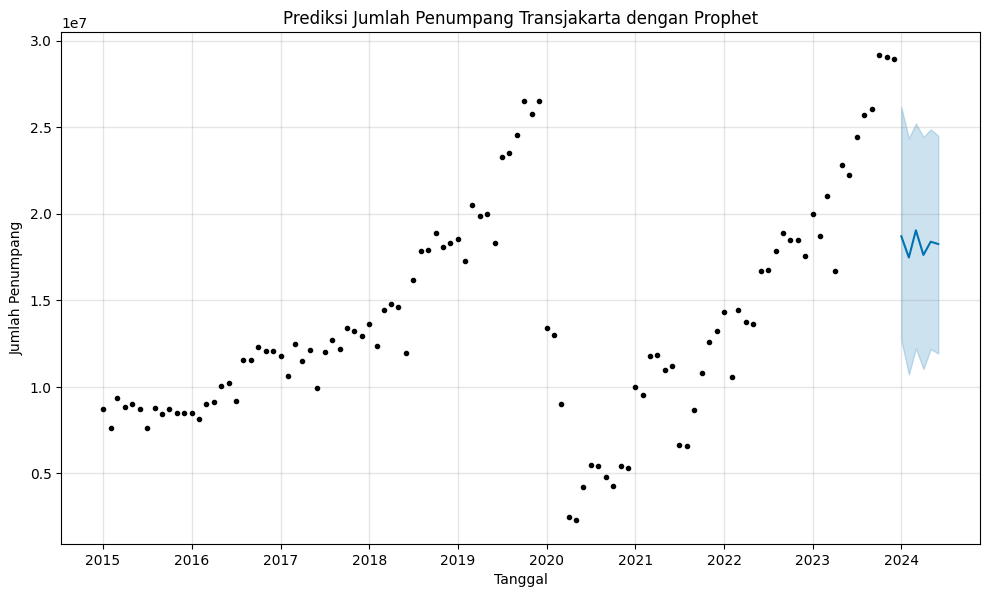

In [26]:
import matplotlib.pyplot as plt

# Visualisasi hasil prediksi
fig = model.plot(forecast)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penumpang')
plt.title('Prediksi Jumlah Penumpang Transjakarta dengan Prophet')
plt.show()

In [27]:
# Menyimpan hasil prediksi ke dalam DataFrame
prophet_submission_df = forecast[['ds', 'yhat']].rename(columns={'ds': 'tanggal', 'yhat': 'jumlah_penumpang'})

# Menambahkan kolom bulan dan tahun
prophet_submission_df['bulan'] = prophet_submission_df['tanggal'].dt.month
prophet_submission_df['tahun'] = prophet_submission_df['tanggal'].dt.year

# Menyimpan hasil prediksi ke file CSV
prophet_submission_df[['bulan', 'tahun', 'jumlah_penumpang']].to_csv('/kaggle/working/testing_jumlah_penumpang_tj.csv', index=False)


# **Melatih Model Prediksi Jumlah Penumpang dengan Random Forest, XGBoost, XGBoost (Tuning), dan Ensemble**

In [28]:
import pandas as pd

# Path untuk data
path_input = '/kaggle/input/indathon-round1-2024/'
path_working = '/kaggle/working/'

# Muat data training dan testing hasil LSTM dan SARIMA
training_penumpang_tj = pd.read_csv('/kaggle/input/indathon-round1-2024/training_jumlah_penumpang_tj.csv', sep=';')
testing_jumlah_penumpang_tj = pd.read_csv(f'{path_working}/testing_jumlah_penumpang_tj.csv', sep=',')

# Muat data armada, penumpang, dan perjalanan
armada_tj_df = pd.read_csv(f'{path_input}/jumlah_armada_tj.csv', sep=';')
penumpang_lrt_df = pd.read_csv(f'{path_input}/jumlah_penumpang_lrt.csv', sep=';')
penumpang_mrt_df = pd.read_csv(f'{path_input}/jumlah_penumpang_mrt.csv', sep=';')
perjalanan_lrt_df = pd.read_csv(f'{path_input}/jumlah_perjalanan_lrt.csv', sep=';')
perjalanan_mrt_df = pd.read_csv(f'{path_input}/jumlah_perjalanan_mrt.csv', sep=';')

penumpang_lrt_df.rename(columns={'jumlah_penumpang': 'jumlah_penumpang_lrt'}, inplace=True)
penumpang_mrt_df.rename(columns={'jumlah_penumpang': 'jumlah_penumpang_mrt'}, inplace=True)
perjalanan_lrt_df.rename(columns={'jumlah_perjalanan': 'jumlah_perjalanan_lrt'}, inplace=True)
perjalanan_mrt_df.rename(columns={'jumlah_perjalanan': 'jumlah_perjalanan_mrt'}, inplace=True)

# Tampilkan beberapa baris dari setiap dataset untuk memastikan data telah dimuat dengan benar
print(training_penumpang_tj.head())
print(testing_jumlah_penumpang_tj.head())
print(armada_tj_df.head())
print(penumpang_lrt_df.head())
print(penumpang_mrt_df.head())
print(perjalanan_lrt_df.head())
print(perjalanan_mrt_df.head())

   bulan  tahun  jumlah_penumpang
0      1   2015           8738599
1      2   2015           7630313
2      3   2015           9383835
3      4   2015           8832441
4      5   2015           9035420
   bulan  tahun  jumlah_penumpang
0      1   2024      1.869623e+07
1      2   2024      1.747228e+07
2      3   2024      1.904340e+07
3      4   2024      1.762162e+07
4      5   2024      1.838445e+07
   bulan  tahun  jumlah_armada_tj
0      1   2023              3853
1      2   2023              3864
2      3   2023              3890
3      4   2023              3853
4      5   2023              3944
   bulan  tahun  jumlah_penumpang_lrt
0      1   2023                 72424
1      2   2023                 76166
2      3   2023                 82754
3      4   2023                 72318
4      5   2023                 78639
   bulan  tahun  jumlah_penumpang_mrt
0      1   2023               2540315
1      2   2023               2378568
2      3   2023               2699585
3      4

In [29]:
# Preprocessing untuk menambahkan kolom 'tanggal' berdasarkan 'tahun' dan 'bulan'
def preprocess(df):
    df['tanggal'] = pd.to_datetime(df['tahun'].astype(str) + '-' + df['bulan'].astype(str) + '-01')
    return df

# Melakukan preprocessing pada semua dataset
training_penumpang_tj = preprocess(training_penumpang_tj)
testing_jumlah_penumpang_tj= preprocess(testing_jumlah_penumpang_tj)
armada_tj_df = preprocess(armada_tj_df)
penumpang_lrt_df = preprocess(penumpang_lrt_df)
penumpang_mrt_df = preprocess(penumpang_mrt_df)
perjalanan_lrt_df = preprocess(perjalanan_lrt_df)
perjalanan_mrt_df = preprocess(perjalanan_mrt_df)

# Menggabungkan data dengan menghindari duplikasi kolom
def merge_data(df1, df2, suffix):
    common_cols = list(set(df1.columns) & set(df2.columns))
    common_cols.remove('tanggal')
    suffixes = ('', suffix) if common_cols else ('', '')
    return df1.merge(df2, on='tanggal', suffixes=suffixes, how='left')

merged_train = merge_data(training_penumpang_tj, armada_tj_df, '_armada')
merged_train = merge_data(merged_train, penumpang_lrt_df, '_lrt')
merged_train = merge_data(merged_train, penumpang_mrt_df, '_mrt')
merged_train = merge_data(merged_train, perjalanan_lrt_df, '_plrt')
merged_train = merge_data(merged_train, perjalanan_mrt_df, '_pmrt')

merged_test = merge_data(testing_jumlah_penumpang_tj, armada_tj_df, '_armada')
merged_test = merge_data(merged_test, penumpang_lrt_df, '_lrt')
merged_test = merge_data(merged_test, penumpang_mrt_df, '_mrt')
merged_test = merge_data(merged_test, perjalanan_lrt_df, '_plrt')
merged_test = merge_data(merged_test, perjalanan_mrt_df, '_pmrt')

# Menampilkan kolom-kolom yang ada dalam merged_train dan merged_test
print("Kolom dalam merged_train:")
print(merged_train.columns)

print("\nKolom dalam merged_test:")
print(merged_test.columns)

Kolom dalam merged_train:
Index(['bulan', 'tahun', 'jumlah_penumpang', 'tanggal', 'bulan_armada',
       'tahun_armada', 'jumlah_armada_tj', 'bulan_lrt', 'tahun_lrt',
       'jumlah_penumpang_lrt', 'bulan_mrt', 'tahun_mrt',
       'jumlah_penumpang_mrt', 'bulan_plrt', 'tahun_plrt',
       'jumlah_perjalanan_lrt', 'bulan_pmrt', 'tahun_pmrt',
       'jumlah_perjalanan_mrt'],
      dtype='object')

Kolom dalam merged_test:
Index(['bulan', 'tahun', 'jumlah_penumpang', 'tanggal', 'bulan_armada',
       'tahun_armada', 'jumlah_armada_tj', 'bulan_lrt', 'tahun_lrt',
       'jumlah_penumpang_lrt', 'bulan_mrt', 'tahun_mrt',
       'jumlah_penumpang_mrt', 'bulan_plrt', 'tahun_plrt',
       'jumlah_perjalanan_lrt', 'bulan_pmrt', 'tahun_pmrt',
       'jumlah_perjalanan_mrt'],
      dtype='object')


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mengisi nilai NaN dengan 0 atau metode lain yang sesuai
merged_train.fillna(0, inplace=True)
merged_test.fillna(0, inplace=True)

# Menyiapkan fitur dan target berdasarkan kolom yang tersedia
features_train = [
    'bulan', 'tahun', 'jumlah_penumpang', 'jumlah_armada_tj', 'jumlah_penumpang_lrt',
    'jumlah_penumpang_mrt', 'jumlah_perjalanan_lrt',
    'jumlah_perjalanan_mrt'
]

features_test = [
    'bulan', 'tahun','jumlah_penumpang', 'jumlah_armada_tj', 'jumlah_penumpang_lrt',
    'jumlah_penumpang_mrt', 'jumlah_perjalanan_lrt',
    'jumlah_perjalanan_mrt'
]

X_train = merged_train[features_train]
y_train = merged_train['jumlah_penumpang']
X_test = merged_test[features_test]

# Menampilkan beberapa baris dari X_train, y_train, dan X_test untuk memastikan data sudah benar
print("X_train:")
print(X_train.tail())
print("\ny_train:")
print(y_train.tail())
print("\nX_test:")
print(X_test.tail())

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nX_train_scaled:")
print(X_train_scaled)
print("\nX_test_scaled:")
print(X_test_scaled)

X_train:
     bulan  tahun  jumlah_penumpang  jumlah_armada_tj  jumlah_penumpang_lrt  \
103      8   2023          25693459            4090.0               87476.0   
104      9   2023          26076085            4136.0               92718.0   
105     10   2023          29146729            4261.0               92809.0   
106     11   2023          29062581            4369.0               91616.0   
107     12   2023          28957580            4356.0               98413.0   

     jumlah_penumpang_mrt  jumlah_perjalanan_lrt  jumlah_perjalanan_mrt  
103             2999724.0                 6322.0                 8253.0  
104             3003191.0                 6120.0                 7909.0  
105             3139371.0                 6314.0                 8229.0  
106             3144382.0                 6120.0                 8229.0  
107             3036358.0                 6350.0                 8124.0  

y_train:
103    25693459
104    26076085
105    29146729
106    2906258

## Pemodelan dengan Random Forest (Tanpa Tuning)

RMSE Model Random Forest (Tanpa Tuning): 134383.5868050266


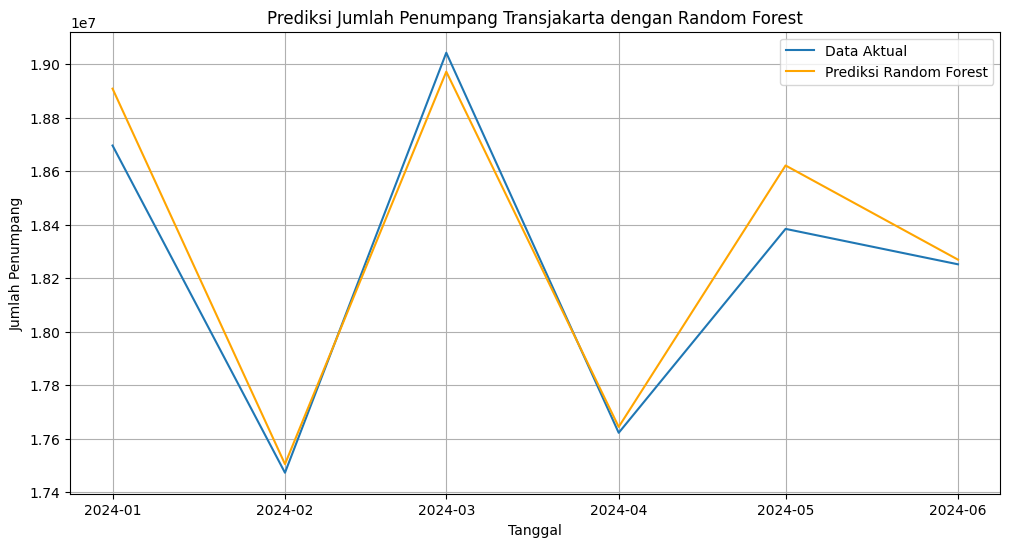

RMSE Model Random Forest: 134383.5868050266
MAE Model Random Forest: 98758.37235021901
R² Model Random Forest: 0.9413107237674797


In [31]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Model Random Forest tanpa tuning
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Menghitung RMSE
rf_rmse = np.sqrt(mean_squared_error(merged_test['jumlah_penumpang'], rf_pred))
print(f'RMSE Model Random Forest (Tanpa Tuning): {rf_rmse}')

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(merged_test['tanggal'], merged_test['jumlah_penumpang'], label='Data Aktual')
plt.plot(merged_test['tanggal'], rf_pred, label='Prediksi Random Forest', color='orange')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penumpang')
plt.title('Prediksi Jumlah Penumpang Transjakarta dengan Random Forest')
plt.legend()
plt.grid(True)
plt.show()

rf_rmse = np.sqrt(mean_squared_error(merged_test['jumlah_penumpang'], rf_pred))
rf_mae = mean_absolute_error(merged_test['jumlah_penumpang'], rf_pred)
rf_r2 = r2_score(merged_test['jumlah_penumpang'], rf_pred)

print(f'RMSE Model Random Forest: {rf_rmse}')
print(f'MAE Model Random Forest: {rf_mae}')
print(f'R² Model Random Forest: {rf_r2}')

## Pemodelan dengan XGBoost (Tanpa Tuning)

RMSE Model XGB: 243984.07981227303
MAE Model XGB: 202287.73234395063
R² Model XGB: 0.8065408501782808


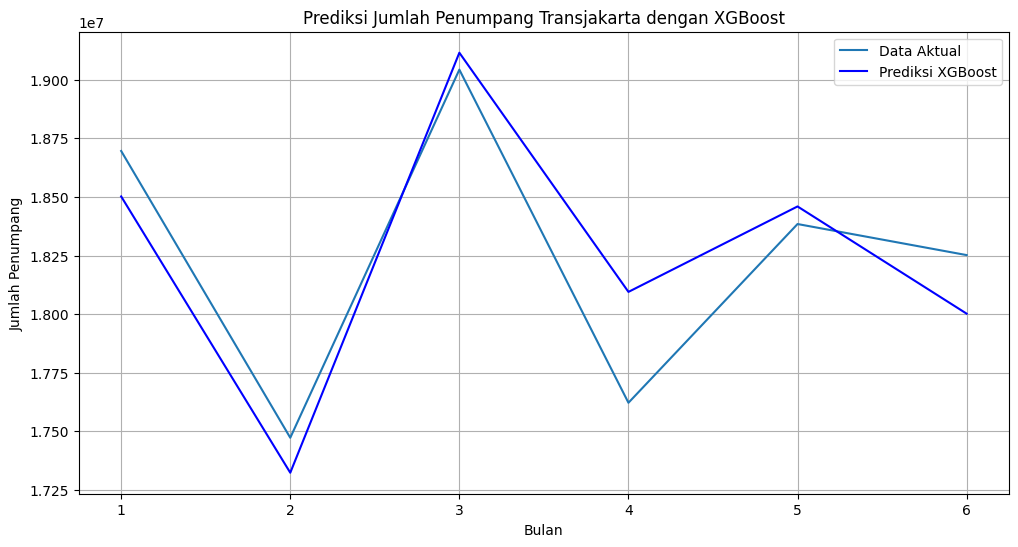

In [32]:
import xgboost as xgb

# Membuat model XGBoost dengan pengaturan default
xgb_model = xgb.XGBRegressor(random_state=42)

# Melatih model
xgb_model.fit(X_train_scaled, y_train)

# Prediksi menggunakan model yang dilatih
xgb_pred = xgb_model.predict(X_test_scaled)

xgb_rmse = np.sqrt(mean_squared_error(merged_test['jumlah_penumpang'], xgb_pred))
xgb_mae = mean_absolute_error(merged_test['jumlah_penumpang'], xgb_pred)
xgb_r2 = r2_score(merged_test['jumlah_penumpang'], xgb_pred)

print(f'RMSE Model XGB: {xgb_rmse}')
print(f'MAE Model XGB: {xgb_mae}')
print(f'R² Model XGB: {xgb_r2}')

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(merged_test['bulan'], merged_test['jumlah_penumpang'], label='Data Aktual')
plt.plot(merged_test['bulan'], xgb_pred, label='Prediksi XGBoost', color='blue')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang')
plt.title('Prediksi Jumlah Penumpang Transjakarta dengan XGBoost')
plt.legend()
plt.grid(True)
plt.show()

## Pemodelan dengan Random Forest (Tuning GridSearchCV)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
RMSE Model Random Forest (Dengan GridSearchCV): 161970.56920138418
MAE Model Random Forest (Dengan GridSearchCV): 123256.00290073703
R² Model Random Forest (Dengan GridSearchCV): 0.9147413378818026


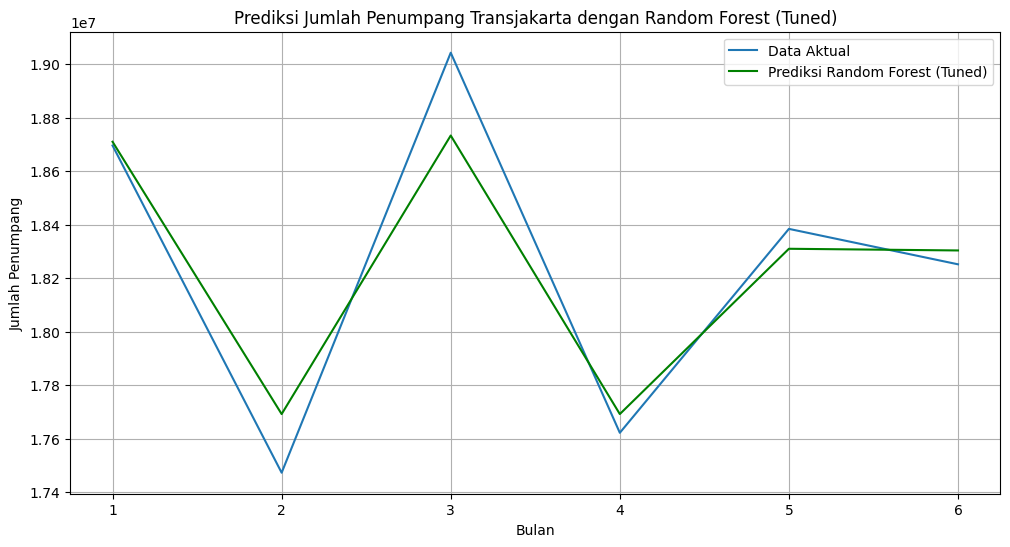

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Menentukan ruang pencarian hyperparameter untuk Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Membuat model Random Forest
rf_model = RandomForestRegressor(random_state=42)

# GridSearchCV untuk Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Melatih model
grid_search_rf.fit(X_train_scaled, y_train)

# Model terbaik dari GridSearchCV
rf_best_model = grid_search_rf.best_estimator_

# Prediksi menggunakan model terbaik dari GridSearchCV
rf_best_pred = rf_best_model.predict(X_test_scaled)

# Menghitung metrik evaluasi
rf_best_rmse = np.sqrt(mean_squared_error(merged_test['jumlah_penumpang'], rf_best_pred))
rf_best_mae = mean_absolute_error(merged_test['jumlah_penumpang'], rf_best_pred)
rf_best_r2 = r2_score(merged_test['jumlah_penumpang'], rf_best_pred)

print(f'RMSE Model Random Forest (Dengan GridSearchCV): {rf_best_rmse}')
print(f'MAE Model Random Forest (Dengan GridSearchCV): {rf_best_mae}')
print(f'R² Model Random Forest (Dengan GridSearchCV): {rf_best_r2}')

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(merged_test['bulan'], merged_test['jumlah_penumpang'], label='Data Aktual')
plt.plot(merged_test['bulan'], rf_best_pred, label='Prediksi Random Forest (Tuned)', color='green')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang')
plt.title('Prediksi Jumlah Penumpang Transjakarta dengan Random Forest (Tuned)')
plt.legend()
plt.grid(True)
plt.show()

## Pemodelan dengan XGBoost (Tuning GridSearchCV)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


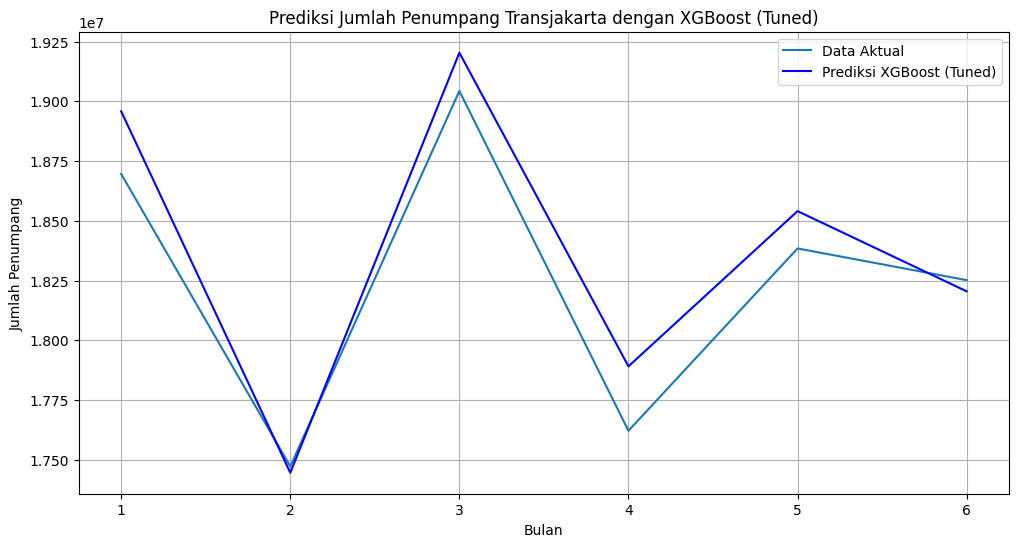

RMSE Model XGBoost (Dengan GridSearchCV): 179914.6992824336
MAE Model XGBoost (Dengan GridSearchCV): 153500.88732509688
R² Model XGBoost (Dengan GridSearchCV): 0.8948039116584403


In [34]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Menentukan ruang pencarian hyperparameter
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Membuat model XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)

# GridSearchCV untuk XGBoost
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Melatih model
grid_search.fit(X_train_scaled, y_train)

# Model terbaik dari GridSearchCV
xgb_best_model = grid_search.best_estimator_

# Prediksi menggunakan model terbaik dari GridSearchCV
xgb_best_pred = xgb_best_model.predict(X_test_scaled)

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(merged_test['bulan'], merged_test['jumlah_penumpang'], label='Data Aktual')
plt.plot(merged_test['bulan'], xgb_best_pred, label='Prediksi XGBoost (Tuned)', color='blue')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang')
plt.title('Prediksi Jumlah Penumpang Transjakarta dengan XGBoost (Tuned)')
plt.legend()
plt.grid(True)
plt.show()

# Menghitung metrik evaluasi
xgb_best_rmse = np.sqrt(mean_squared_error(merged_test['jumlah_penumpang'], xgb_best_pred))
xgb_best_mae = mean_absolute_error(merged_test['jumlah_penumpang'], xgb_best_pred)
xgb_best_r2 = r2_score(merged_test['jumlah_penumpang'], xgb_best_pred)

print(f'RMSE Model XGBoost (Dengan GridSearchCV): {xgb_best_rmse}')
print(f'MAE Model XGBoost (Dengan GridSearchCV): {xgb_best_mae}')
print(f'R² Model XGBoost (Dengan GridSearchCV): {xgb_best_r2}')

## Pemodelan Ensemble (RF + XGB) Tanpa Tuning

In [ ]:
# Membuat ensemble dengan cara rata-rata prediksi dari kedua model
ensemble_pred = (xgb_pred + rf_pred) / 2

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(merged_test['bulan'], merged_test['jumlah_penumpang'], label='Data Aktual')
plt.plot(merged_test['bulan'], xgb_pred, label='Prediksi XGBoost', color='blue')
plt.plot(merged_test['bulan'], rf_pred, label='Prediksi Random Forest', color='green')
plt.plot(merged_test['bulan'], ensemble_pred, label='Prediksi Ensemble', color='red')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang')
plt.title('Prediksi Jumlah Penumpang Transjakarta dengan Ensemble Model')
plt.legend()
plt.grid(True)
plt.show()

# Menghitung metrik evaluasi
ensemble_rmse = np.sqrt(mean_squared_error(merged_test['jumlah_penumpang'], ensemble_pred))
ensemble_mae = mean_absolute_error(merged_test['jumlah_penumpang'], ensemble_pred)
ensemble_r2 = r2_score(merged_test['jumlah_penumpang'], ensemble_pred)

print(f'RMSE Model Ensemble: {ensemble_rmse}')
print(f'MAE Model Ensemble: {ensemble_mae}')
print(f'R² Model Ensemble: {ensemble_r2}')

## Pemodelan dengan Ensemble (RF + XGB) Tuning

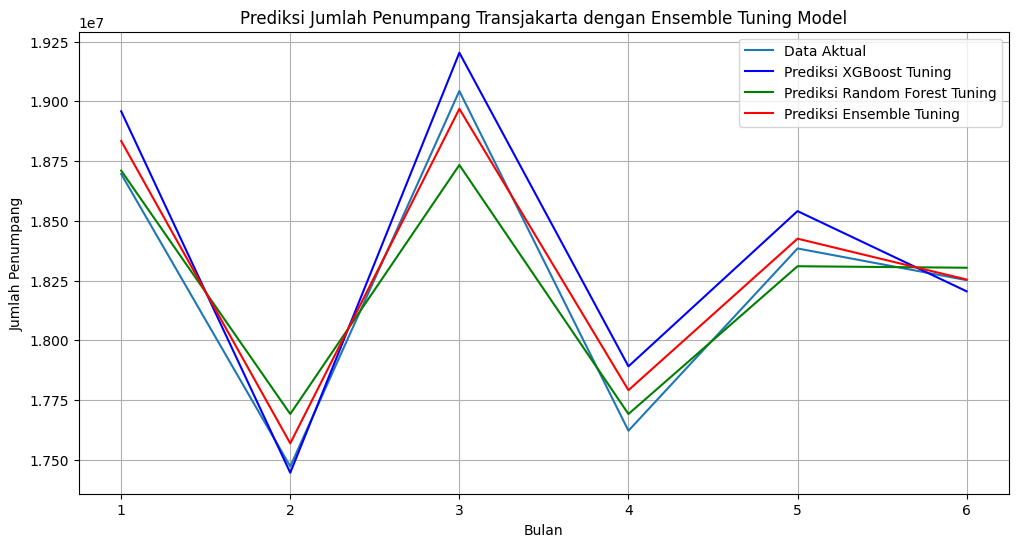

RMSE Model Ensemble Tuning: 103674.75155148284
MAE Model Ensemble Tuning: 87104.38346133009
R² Model Ensemble Tuning: 0.965068896691639


In [35]:
# Membuat ensemble dengan cara rata-rata prediksi dari kedua model
ensemble_best_pred = (xgb_best_pred + rf_best_pred) / 2

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(merged_test['bulan'], merged_test['jumlah_penumpang'], label='Data Aktual')
plt.plot(merged_test['bulan'], xgb_best_pred, label='Prediksi XGBoost Tuning', color='blue')
plt.plot(merged_test['bulan'], rf_best_pred, label='Prediksi Random Forest Tuning', color='green')
plt.plot(merged_test['bulan'], ensemble_best_pred, label='Prediksi Ensemble Tuning', color='red')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang')
plt.title('Prediksi Jumlah Penumpang Transjakarta dengan Ensemble Tuning Model')
plt.legend()
plt.grid(True)
plt.show()

# Menghitung metrik evaluasi
ensemble_best_rmse = np.sqrt(mean_squared_error(merged_test['jumlah_penumpang'], ensemble_best_pred))
ensemble_best_mae = mean_absolute_error(merged_test['jumlah_penumpang'], ensemble_best_pred)
ensemble_best_r2 = r2_score(merged_test['jumlah_penumpang'], ensemble_best_pred)

print(f'RMSE Model Ensemble Tuning: {ensemble_best_rmse}')
print(f'MAE Model Ensemble Tuning: {ensemble_best_mae}')
print(f'R² Model Ensemble Tuning: {ensemble_best_r2}')

Dari berbagai kombinasi pemodelan, model yang terbaik adalah dengan menggunakan Ensemble dengan tuning

In [36]:
# Menyimpan hasil prediksi ke dalam DataFrame
submission_df = pd.DataFrame({
    'id': range(1, 7),
    'jumlah_penumpang': ensemble_best_pred
})

# Menyimpan hasil prediksi ke file CSV
submission_df.to_csv('/kaggle/working/submission.csv', index=False)